In [1]:
import numpy as np
import pandas as pd

In [3]:
original_dms_data = pd.read_csv("/Users/liza/Documents/Bioinfo Project/DMS_data/AAAA_GFP_dms_data_original_komplett.csv")
only_scores_column = original_dms_data['DMS_score']
df_only_scores_column = pd.DataFrame(only_scores_column)
only_mutant_column = original_dms_data['mutant']


In [4]:
list_mut_count_in_progress = []
for i in range(len(only_mutant_column)):
    list_mut_count_in_progress.append(only_mutant_column.iloc[i].count(':'))
list_mut_count_prae = np.array(list_mut_count_in_progress)
list_mut_count = (list_mut_count_prae + 1)
df_mutation_counts = pd.DataFrame(list_mut_count)

In [5]:
type(df_mutation_counts)

scores_plus_counts = df_only_scores_column.join(df_mutation_counts)
scores_plus_counts.columns = ['fscores', 'mutation_count']

In [6]:
#the fscores sorted after mut_count
one_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 1)]
two_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 2)]
three_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 3)]
four_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 4)]
five_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 5)]
six_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 6)]
seven_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 7)]
eight_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 8)]
nine_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 9)]
ten_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 10)]
eleven_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 11)]

# nur die functional scores zu den jeweiligen mutations counts

In [7]:
#example variances
print(np.var(one_mutation_fscores))
print(np.var(two_mutation_fscores))
print(np.var(three_mutation_fscores))

fscores           0.386754
mutation_count    0.000000
dtype: float64
fscores           0.480284
mutation_count    0.000000
dtype: float64
fscores           0.862342
mutation_count    0.000000
dtype: float64


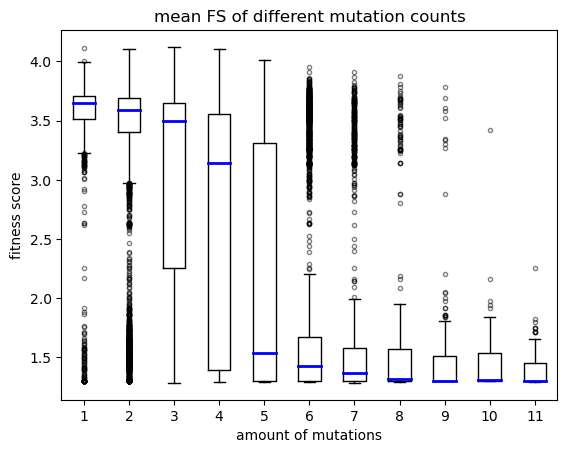

In [10]:
import matplotlib.pyplot as plt

# Boxplots to show the distribution of the fscores of each group
boxplot = plt.boxplot([
    one_mutation_fscores['fscores'], two_mutation_fscores['fscores'], three_mutation_fscores['fscores'],
    four_mutation_fscores['fscores'], five_mutation_fscores['fscores'], six_mutation_fscores['fscores'],
    seven_mutation_fscores['fscores'], eight_mutation_fscores['fscores'], nine_mutation_fscores['fscores'],
    ten_mutation_fscores['fscores'], eleven_mutation_fscores['fscores']
])

# Customize the boxplot colors
for box in boxplot['boxes']:
    box.set(color='black', linewidth=1)

for whisker in boxplot['whiskers']:
    whisker.set(color='black', linewidth=1)

for cap in boxplot['caps']:
    cap.set(color='black', linewidth=1)

for median in boxplot['medians']:
    median.set(color='blue', linewidth=2)

for flier in boxplot['fliers']:
    flier.set(marker='.', color='grey', alpha=0.5)  #outlier

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
plt.ylabel('fitness score')
plt.xlabel('amount of mutations')
plt.title('mean FS of different mutation counts')

# Set the background color to white
fig = plt.gca().get_figure()
fig.patch.set_facecolor('white')

# Save the plot as a PNG file
plt.savefig('boxplot.png', dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())

# Display the plot
plt.show()


In [9]:
# mann- whitney-u-test
from scipy.stats import mannwhitneyu
statistic, p_value = mannwhitneyu(eight_mutation_fscores, seven_mutation_fscores)
if p_value[0] > 0.01:
    print('kein signifikanter Unterschied')
else:
    print('signifikanter Unterschied')

kein signifikanter Unterschied
